In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm
from scipy.stats.distributions import chi2
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv("/Users/jisusingh/Downloads/MTH_522/Project3/economic-indicators.csv")

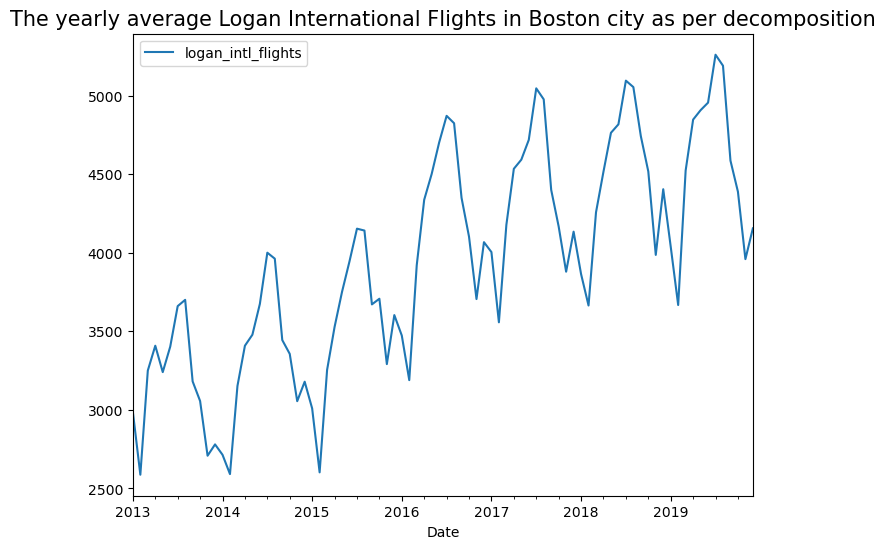

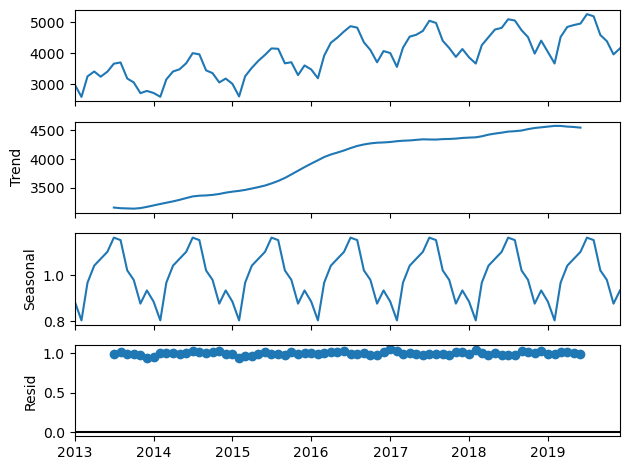

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.plot(x='Date', y='logan_intl_flights', figsize=(8,6))
plt.title('The yearly average Logan International Flights in Boston city as per decomposition', fontsize=15)
df.set_index('Date', inplace=True)
analysis = df[['logan_intl_flights']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

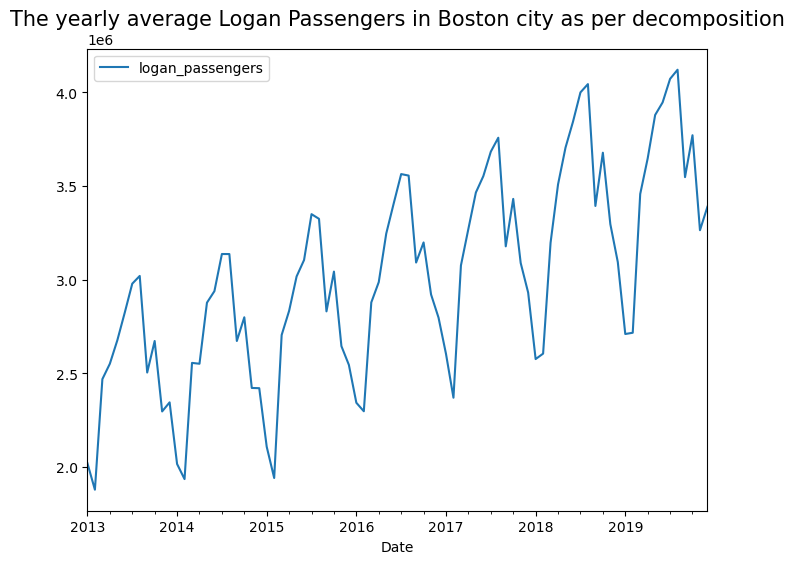

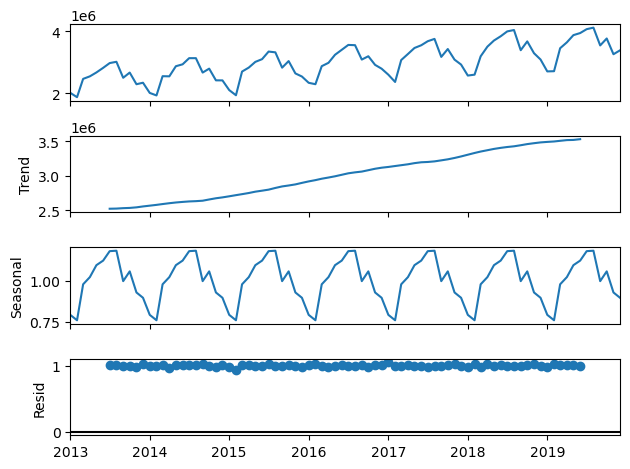

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.plot(x='Date', y='logan_passengers', figsize=(8,6))
plt.title('The yearly average Logan Passengers in Boston city as per decomposition', fontsize=15)
df.set_index('Date', inplace=True)
analysis = df[['logan_passengers']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

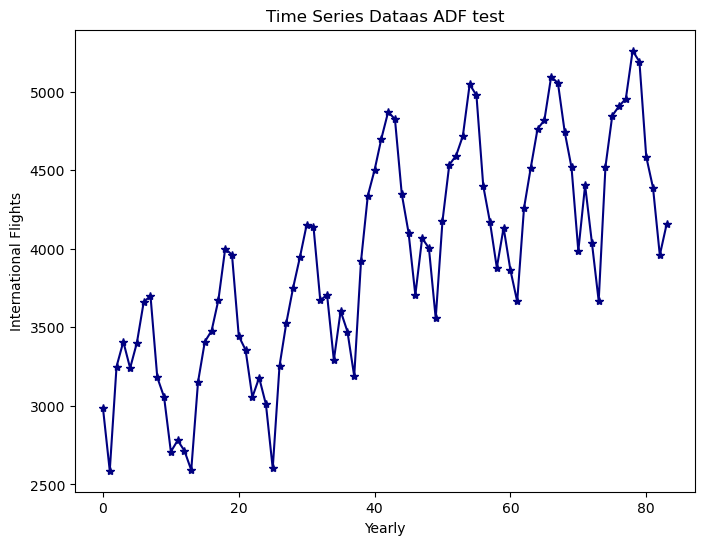

ADF Statistic: -2.1352623393675287
p-value: 0.2305737935110438
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957
The time series is likely non-stationary (fail to reject the null hypothesis)


In [4]:
df['Year'] = pd.to_datetime(df['Year'])

# Plot the original time series data
plt.figure(figsize=(8, 6))
plt.plot(df['logan_intl_flights'], marker='*', color='navy', linestyle='-')
plt.title('Time Series Dataas ADF test')
plt.xlabel('Yearly')
plt.ylabel('International Flights')
plt.show()

# Take the first difference
df['stationary_data'] = df['logan_intl_flights'] - df['logan_intl_flights'].shift(1)

# Perform Augmented Dickey-Fuller test
result = adfuller(df['logan_intl_flights'].dropna(), autolag='AIC')

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')

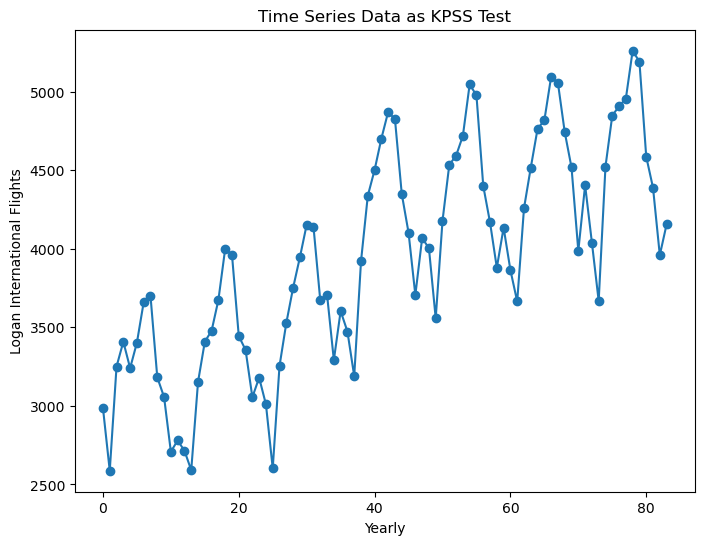

KPSS Statistic: 1.1704630759924322
P-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Result: The time series is not stationary (reject the null hypothesis)


/var/folders/g8/mxccscmj14l9stg98tmxsc2h0000gn/T/ipykernel_9800/4191961095.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(time_series)


In [5]:
from statsmodels.tsa.stattools import kpss

time_series = df['logan_intl_flights']

# Plot the time series
plt.figure(figsize=(8, 6))
plt.plot((time_series), marker='o')
plt.title('Time Series Data as KPSS Test')
plt.xlabel('Yearly')
plt.ylabel('Logan International Flights')
plt.show()

# Perform Kwiatkowski-Phillips-Schmidt-Shin test
result = kpss(time_series)

# Extract and print the test results
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print(f'KPSS Statistic: {kpss_statistic}')
print(f'P-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the test results
alpha = 0.05
if p_value < alpha:
    print("Result: The time series is not stationary (reject the null hypothesis)")
else:
    print("Result: The time series is stationary (fail to reject the null hypothesis)")

## Differencing

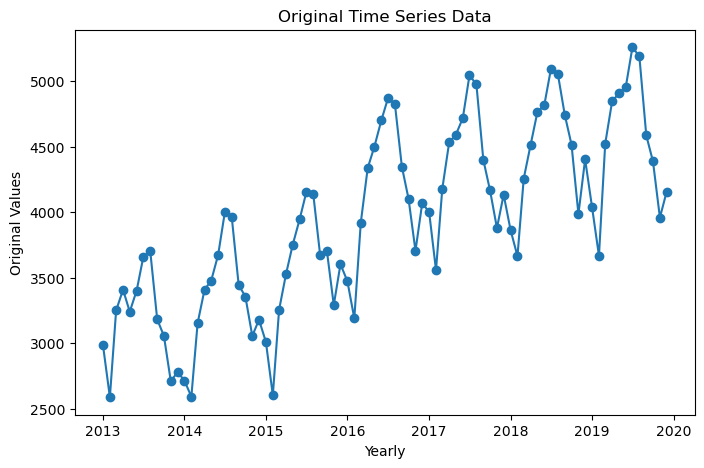

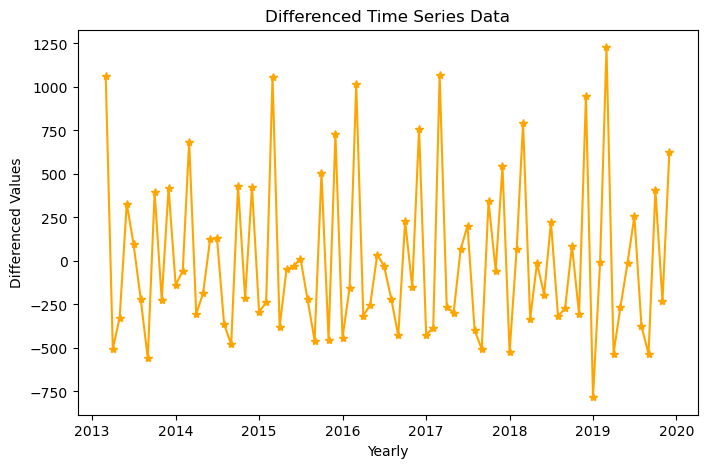

ADF Statistic: -13.171270506497267
p-value: 1.249002760595815e-24
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957
The time series is likely stationary (reject the null hypothesis)


In [18]:
# Plot the original time series data
plt.figure(figsize=(8, 5))
plt.plot(df['logan_intl_flights'], marker='o', linestyle='-')
plt.title('Original Time Series Data')
plt.xlabel('Yearly')
plt.ylabel('Original Values')
plt.show()

# Applying differencing technique to make the data stationary
df['logan_stationary']=df['logan_intl_flights'].diff().diff()

# Plot the differenced time series data
plt.figure(figsize=(8, 5))
plt.plot(df['logan_stationary'], color='orange', marker='*', linestyle='-')
plt.title('Differenced Time Series Data')
plt.xlabel('Yearly')
plt.ylabel('Differenced Values')
plt.show()

# Perform Augmented Dickey-Fuller test
result = adfuller(df['logan_stationary'].dropna(), autolag='AIC')

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is likely stationary (reject the null hypothesis)')
else:
    print('The time series is likely non-stationary (fail to reject the null hypothesis)')

In [19]:
df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [20]:
df=df[2:]

## ACF and PACF

<Figure size 800x600 with 0 Axes>

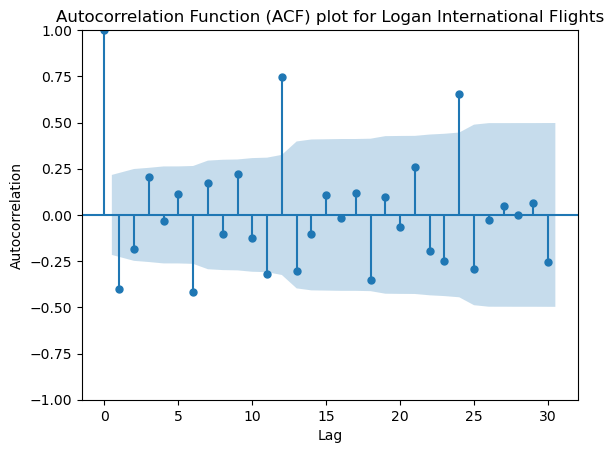

<Figure size 800x600 with 0 Axes>

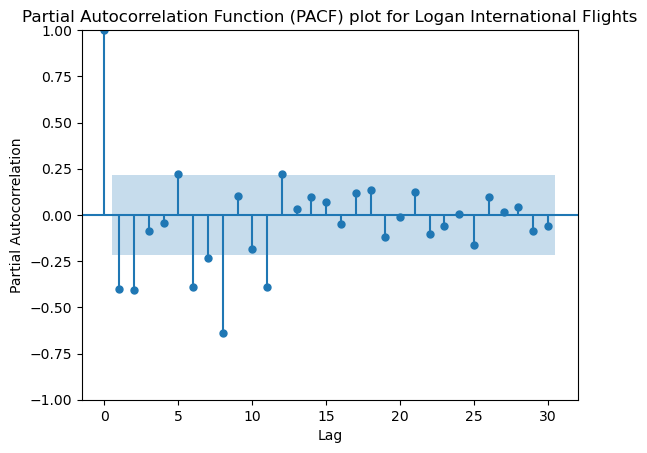

In [24]:
data_flight = df['logan_stationary']

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(8, 6))
plot_acf(data_flight, lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF) plot for Logan International Flights')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(8, 6))
plot_pacf(data_flight, lags=30)
plt.title('Partial Autocorrelation Function (PACF) plot for Logan International Flights')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

Mean Absolute Error 212.43580264345053
predicted=764.006729, expected=949.000000
predicted=-508.317921, expected=-783.000000
predicted=96.415909, expected=-7.000000
predicted=724.290375, expected=1228.000000
predicted=-282.238634, expected=-532.000000
predicted=26.424697, expected=-264.000000
predicted=-245.701229, expected=-12.000000
predicted=255.515707, expected=257.000000
predicted=-359.539927, expected=-375.000000
predicted=-203.276198, expected=-534.000000
predicted=17.028579, expected=406.000000
predicted=-288.671206, expected=-231.000000
predicted=751.666465, expected=625.000000


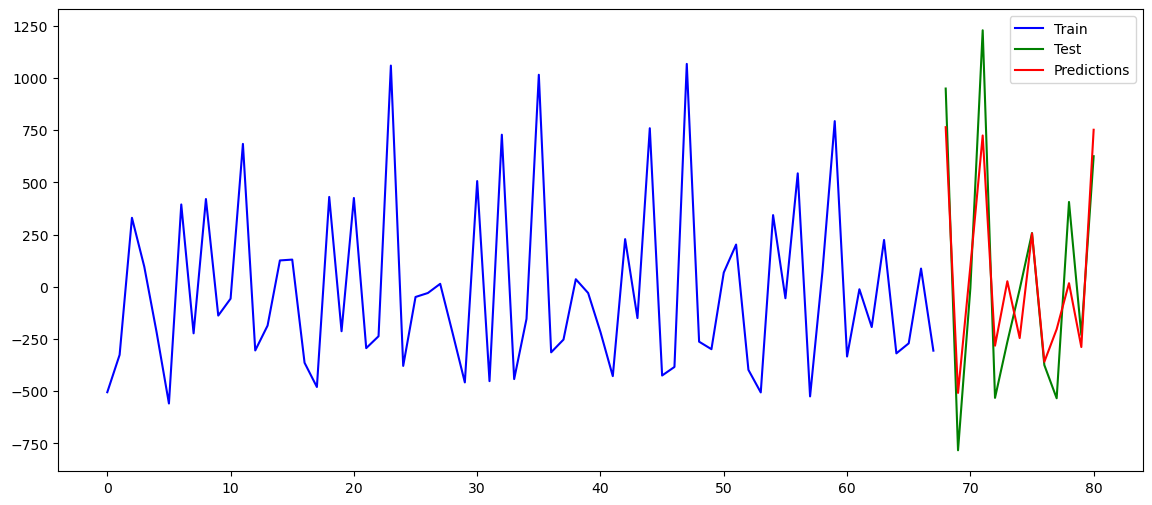

In [9]:
# Applying AR model in the time series analysis

df.set_index('Date', inplace=True)
X = df['logan_stationary'].values
train, test = X[1:len(X)-13], X[len(X)-13:]
model = AutoReg(train, lags=11)
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
mse = mean_absolute_error(test, predictions)   
print("Mean Absolute Error", mse)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_absolute_error(test, predictions))
pyplot.figure(figsize=(14, 6))
pyplot.plot(range(len(train)), train, color='blue', label='Train')
pyplot.plot(range(len(train), len(train) + len(test)), test, color='green', label='Test')
pyplot.plot(range(len(train), len(train) + len(test)), predictions, color='red', label='Predictions')
pyplot.legend()
pyplot.show()

/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


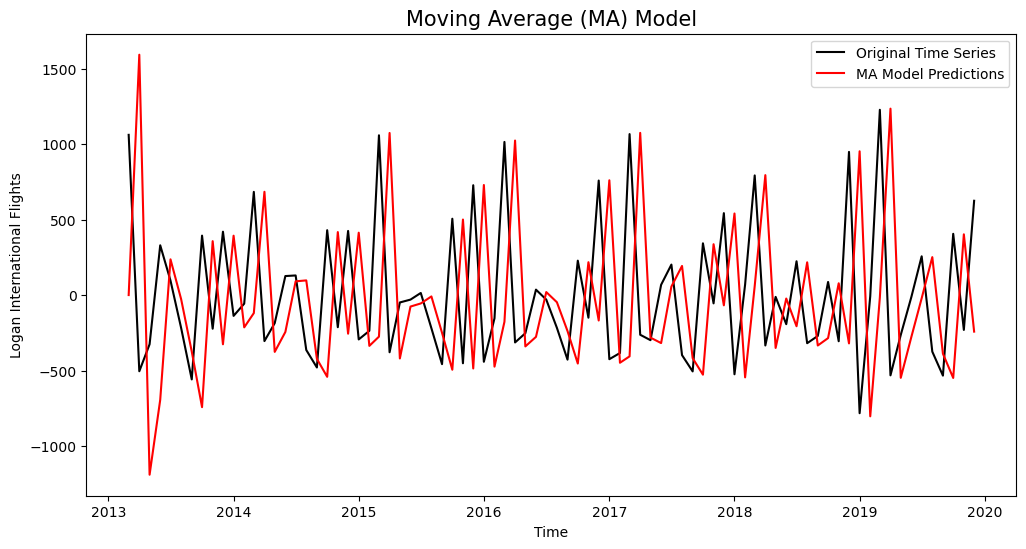

                               SARIMAX Results                                
Dep. Variable:       logan_stationary   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -644.757
Date:                Sun, 10 Dec 2023   AIC                           1293.514
Time:                        21:56:29   BIC                           1298.278
Sample:                    03-01-2013   HQIC                          1295.424
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9993      5.632     -0.177      0.859     -12.037      10.038
sigma2      5.681e+05   3.22e+06      0.176      0.860   -5.75e+06    6.88e+06
Ljung-Box (L1) (Q):                  25.48   Jarque-

In [26]:
# Applying The MA Model

time_series = df['logan_stationary']

# Define the order of the MA model
order = (0, 2, 1)  # (p-autoregressive, d-differencing, q-moving average)

# Fit the MA model
ma_model = ARIMA(time_series, order=order)
ma_results = ma_model.fit()

# Generate predictions
predictions = ma_results.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='black')
plt.plot(predictions, label='MA Model Predictions', color='red')
plt.legend()
plt.title('Moving Average (MA) Model', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Logan International Flights')
plt.show()
print(ma_results.summary())

/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jisusingh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


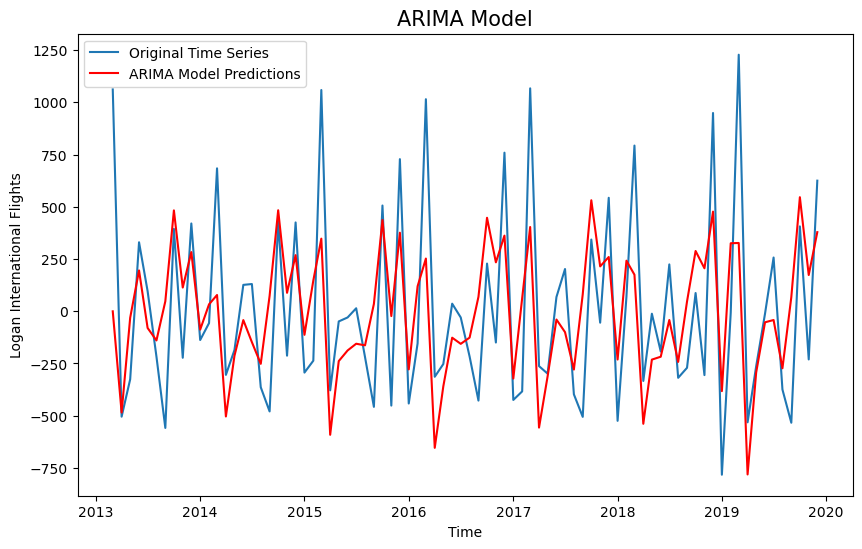

                               SARIMAX Results                                
Dep. Variable:       logan_stationary   No. Observations:                   82
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -595.668
Date:                Sun, 10 Dec 2023   AIC                           1199.336
Time:                        21:49:21   BIC                           1208.963
Sample:                    03-01-2013   HQIC                          1203.201
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5975      1.838     -0.325      0.745      -4.201       3.006
ar.L1          0.0880      0.158      0.558      0.577      -0.221       0.397
ma.L1         -1.0000      0.192     -5.196      0.0

In [11]:
# Define the order of the ARIMA model
order = (1, 0, 1)  # (p-autoregressive, d-differencing, q-moving average)

# Fit the ARIMA model
arima_model = ARIMA(time_series, order=order)
arima_results = arima_model.fit()

# Generate predictions
predictions = arima_results.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series')
plt.plot(predictions, label='ARIMA Model Predictions', color='red')
plt.legend()
plt.title('ARIMA Model', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Logan International Flights')
plt.show()
print(arima_results.summary())

Mean Absolute Error: 212.43580264345053
predicted=764.006729, expected=949.000000
predicted=-508.317921, expected=-783.000000
predicted=96.415909, expected=-7.000000
predicted=724.290375, expected=1228.000000
predicted=-282.238634, expected=-532.000000
predicted=26.424697, expected=-264.000000
predicted=-245.701229, expected=-12.000000
predicted=255.515707, expected=257.000000
predicted=-359.539927, expected=-375.000000
predicted=-203.276198, expected=-534.000000
predicted=17.028579, expected=406.000000
predicted=-288.671206, expected=-231.000000
predicted=751.666465, expected=625.000000


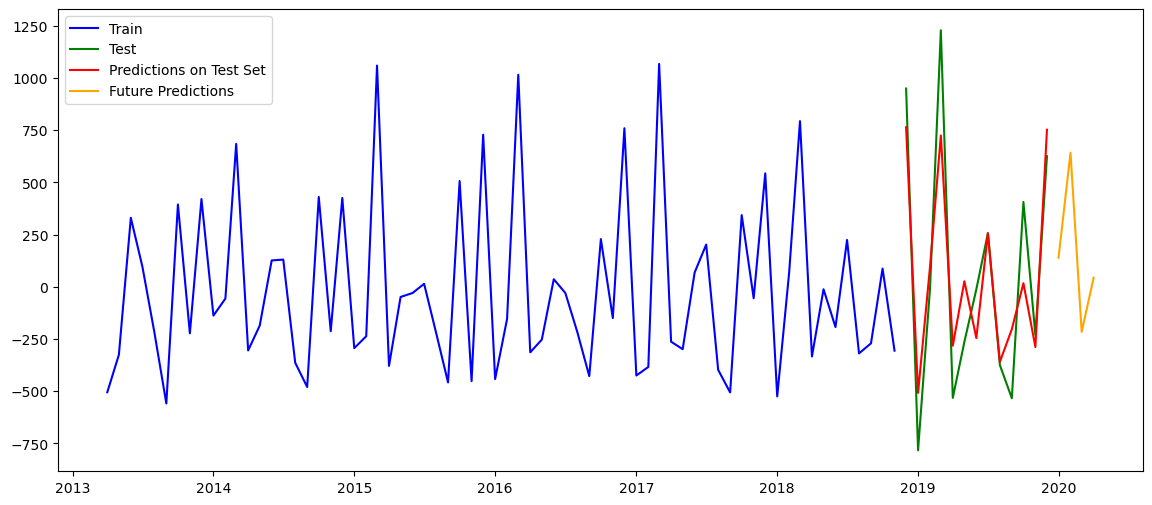

In [32]:
from pandas import date_range
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.api import AutoReg

# Assuming df is your DataFrame and 'Date' is the name of the datetime column
#df.set_index('Date', inplace=True)

# Extract the time series data
X = df['logan_stationary'].values

# Split the data into train and test sets
train, test = X[1:len(X)-13], X[len(X)-13:]

# Fit the AutoReg model
model = AutoReg(train, lags=11)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate Mean Absolute Error
mse = mean_absolute_error(test, predictions)
print("Mean Absolute Error:", mse)

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

# Forecast future values
forecast_steps = 3  # Change this to the number of steps you want to forecast into the future
future_dates = date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')
future_predictions = model_fit.predict(start=len(X), end=len(X) + forecast_steps, dynamic=False)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df.index[1:len(X)-13], train, color='blue', label='Train')
plt.plot(df.index[len(X)-13:], test, color='green', label='Test')
plt.plot(df.index[len(X)-13:], predictions, color='red', label='Predictions on Test Set')
plt.plot(future_dates, future_predictions, color='orange', label=f'Future Predictions')
plt.legend()
plt.show()